In [2]:
dataset_food_list = ['French beans', 'almond', 'apple', 'apricot', 'asparagus', 'avocado', 'bamboo shoots', 'banana', 'bean sprouts', 'biscuit', 'blueberry', 'bread', 'broccoli', 'cabbage', 'cake', 'candy', 'carrot', 'cashew', 'cauliflower', 'celery stick', 'cheese butter', 'cherry', 'chicken duck', 'chocolate', 'cilantro mint', 'coffee', 'corn', 'crab', 'cucumber', 'date', 'dried cranberries', 'egg tart', 'egg', 'eggplant', 'enoki mushroom', 'fig', 'fish', 'french fries', 'fried meat', 'garlic', 'ginger', 'grape', 'green beans', 'hamburg', 'hanamaki baozi', 'ice cream', 'juice', 'kelp', 'king oyster mushroom', 'kiwi', 'lamb', 'lemon', 'lettuce', 'mango', 'melon', 'milk', 'milkshake', 'noodles', 'okra', 'olives', 'onion', 'orange', 'other ingredients', 'oyster mushroom', 'pasta', 'peach', 'peanut', 'pear', 'pepper', 'pie', 'pineapple', 'pizza', 'popcorn', 'pork', 'potato', 'pudding', 'pumpkin', 'rape', 'raspberry', 'red beans', 'rice', 'salad', 'sauce', 'sausage', 'seaweed', 'shellfish', 'shiitake', 'shrimp', 'snow peas', 'soup', 'soy', 'spring onion', 'steak', 'strawberry', 'tea', 'tofu', 'tomato', 'walnut', 'watermelon', 'white button mushroom', 'white radish', 'wine', 'wonton dumplings']
dataset_food_list

['French beans',
 'almond',
 'apple',
 'apricot',
 'asparagus',
 'avocado',
 'bamboo shoots',
 'banana',
 'bean sprouts',
 'biscuit',
 'blueberry',
 'bread',
 'broccoli',
 'cabbage',
 'cake',
 'candy',
 'carrot',
 'cashew',
 'cauliflower',
 'celery stick',
 'cheese butter',
 'cherry',
 'chicken duck',
 'chocolate',
 'cilantro mint',
 'coffee',
 'corn',
 'crab',
 'cucumber',
 'date',
 'dried cranberries',
 'egg tart',
 'egg',
 'eggplant',
 'enoki mushroom',
 'fig',
 'fish',
 'french fries',
 'fried meat',
 'garlic',
 'ginger',
 'grape',
 'green beans',
 'hamburg',
 'hanamaki baozi',
 'ice cream',
 'juice',
 'kelp',
 'king oyster mushroom',
 'kiwi',
 'lamb',
 'lemon',
 'lettuce',
 'mango',
 'melon',
 'milk',
 'milkshake',
 'noodles',
 'okra',
 'olives',
 'onion',
 'orange',
 'other ingredients',
 'oyster mushroom',
 'pasta',
 'peach',
 'peanut',
 'pear',
 'pepper',
 'pie',
 'pineapple',
 'pizza',
 'popcorn',
 'pork',
 'potato',
 'pudding',
 'pumpkin',
 'rape',
 'raspberry',
 'red beans',

In [3]:
from fuzzywuzzy import process

def find_approximate_meanings(target_strings, word_list, ratio_target):
    result = {}
    for target_string in target_strings:
        matches = process.extract(target_string, word_list)
        matches = [(match[0], word_list.index(match[0])) for match in matches if match[1] >= ratio_target]
        if matches:
            result[target_string] = ([match[0] for match in matches], [match[1] for match in matches])
        else:
            result[target_string] = ([], [])
    return result

# excluded_foods = ["cake", "bottle", "can", "water", "juice", "milk", "drink", "beer", "wine", \
    # "champagne", "coca-cola", "coffee", "tea", "fruit", "nectarine", "orange", "kiwi", "peach", \
    # "prosecco", "praline", "ice-cream", "sorbet", "apple", "pear", "prune", "lemon"]

excluded_foods = []

dict_food_not_used = find_approximate_meanings(excluded_foods, dataset_food_list, 80)
display(dict_food_not_used)
list_food_not_used = []
[list_food_not_used.extend(value[1]) for key, value in dict_food_not_used.items() if value[1] not in list_food_not_used]
display(list_food_not_used)

{}

[]

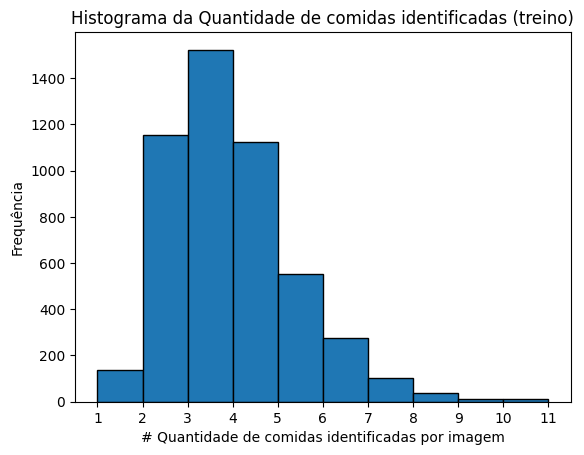

In [20]:
import os
import matplotlib.pyplot as plt

directory = '/Users/marcelosouza/Documents/MBA_USP/5_TCC/Insulin_Suggester/Datasets/food v18.v1i.yolov8/train/labels'

list_food_used = [x for x in range(len(dataset_food_list)) if x not in list_food_not_used]
results_filtered = []
            
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath) as f:
            content = f.read()
            nums_label = []
            nums = [int(word) for word in content.split() if word.isdigit()]
            nums_label.extend([num for num in nums if num > 1 and num in list_food_used])
            nums_label_text = [dataset_food_list[i] for i in nums_label if i > 0 and i <= len(dataset_food_list)]
            filename_reduced = filename[:6]
            if len(nums_label) > 0:
                results_filtered.append((filename_reduced, nums_label_text, len(nums_label)))
                # results_filtered.append((filename_reduced, nums_label, len(nums_label)))

 
# Extract the data for the histogram
data = [item[2] for item in results_filtered]

# Plot the histogram
plt.hist(data, bins=10, edgecolor='black')

# Set the x-ticks to cover all the values in the data, from the minimum to the maximum
plt.xticks(range(min(data), max(data) + 1))

plt.xlabel('# Quantidade de comidas identificadas por imagem')
plt.ylabel('Frequência')
plt.title('Histograma da Quantidade de comidas identificadas (treino)')
plt.show() 
            
# plt.hist([item[2] for item in results_filtered], bins=15, edgecolor='black')
# plt.xlabel('# Quantidade de comidas identificadas por imagem')
# plt.ylabel('Frequência')
# plt.title('Histograma da Quantidade de comidas identificadas (treino)')
# plt.xticks()
# plt.show()

# display(results_filtered)
# display(nums_label)

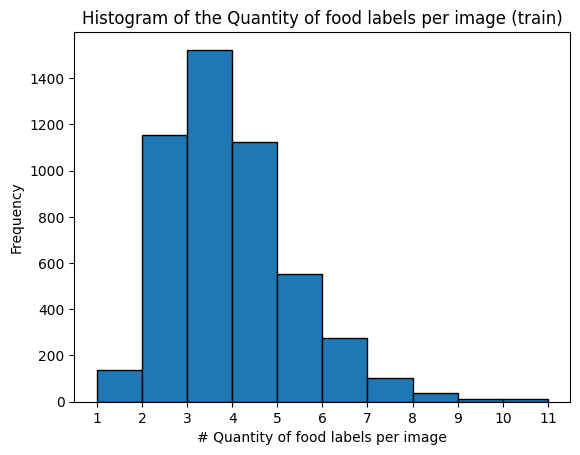

In [4]:
import os
import matplotlib.pyplot as plt

directory = '/Users/marcelosouza/Documents/MBA_USP/5_TCC/Insulin_Suggester/Datasets/food v18.v1i.yolov8/train/labels'

list_food_used = [x for x in range(len(dataset_food_list)) if x not in list_food_not_used]
results_filtered = []
            
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath) as f:
            content = f.read()
            nums_label = []
            nums = [int(word) for word in content.split() if word.isdigit()]
            nums_label.extend([num for num in nums if num > 1 and num in list_food_used])
            nums_label_text = [dataset_food_list[i] for i in nums_label if i > 0 and i <= len(dataset_food_list)]
            filename_reduced = filename[:6]
            if len(nums_label) > 0:
                results_filtered.append((filename_reduced, nums_label_text, len(nums_label)))
                # results_filtered.append((filename_reduced, nums_label, len(nums_label)))

 
# Extract the data for the histogram
data = [item[2] for item in results_filtered]

# Plot the histogram
plt.hist(data, bins=10, edgecolor='black')

# Set the x-ticks to cover all the values in the data, from the minimum to the maximum
plt.xticks(range(min(data), max(data) + 1))

plt.xlabel('# Quantity of food labels per image')
plt.ylabel('Frequency')
plt.title('Histogram of the Quantity of food labels per image (train)')
plt.show() 
            
# plt.hist([item[2] for item in results_filtered], bins=15, edgecolor='black')
# plt.xlabel('# Quantidade de comidas identificadas por imagem')
# plt.ylabel('Frequência')
# plt.title('Histograma da Quantidade de comidas identificadas (treino)')
# plt.xticks()
# plt.show()

# display(results_filtered)
# display(nums_label)

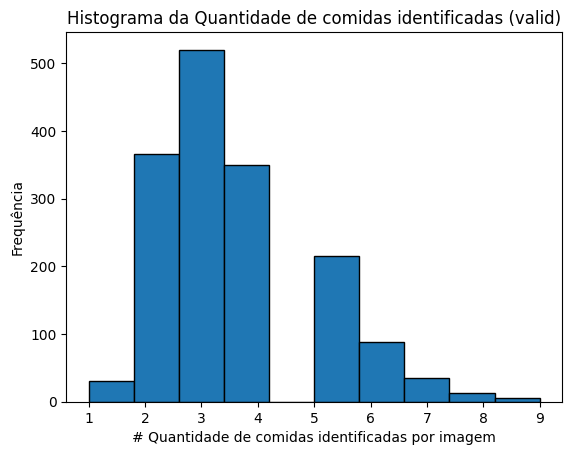

[('000052',
  ['shiitake',
   'pork',
   'carrot',
   'white button mushroom',
   'broccoli',
   'noodles',
   'pepper'],
  7),
 ('000049', ['apple', 'dried cranberries', 'cheese butter'], 3),
 ('000053', ['steak', 'rice', 'broccoli'], 3),
 ('000047',
  ['pasta', 'cauliflower', 'broccoli', 'tomato', 'carrot', 'fried meat'],
  6),
 ('000046',
  ['rice', 'broccoli', 'fish', 'other ingredients', 'other ingredients'],
  5),
 ('000058', ['bread', 'onion', 'steak', 'fried meat'], 4),
 ('000050', ['pork', 'noodles', 'pepper'], 3),
 ('000053', ['other ingredients', 'tea'], 2),
 ('000044', ['bread', 'sauce'], 2),
 ('000051', ['carrot', 'chicken duck', 'lemon'], 3),
 ('000056', ['soy', 'fried meat', 'bread', 'egg tart'], 4),
 ('000046', ['pie', 'strawberry', 'egg tart'], 3),
 ('000048',
  ['carrot', 'pepper', 'milkshake', 'egg tart', 'asparagus', 'french fries'],
  6),
 ('000045', ['ice cream', 'strawberry', 'bread'], 3),
 ('000059', ['ice cream', 'potato', 'pie', 'cheese butter', 'sausage'], 5)

In [21]:
import os
import matplotlib.pyplot as plt

directory = '/Users/marcelosouza/Documents/MBA_USP/5_TCC/Insulin_Suggester/Datasets/food v18.v1i.yolov8/valid/labels'

list_food_used = [x for x in range(len(dataset_food_list)) if x not in list_food_not_used]
results_filtered = []
            
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath) as f:
            content = f.read()
            nums_label = []
            nums = [int(word) for word in content.split() if word.isdigit()]
            nums_label.extend([num for num in nums if num > 1 and num in list_food_used])
            nums_label_text = [dataset_food_list[i] for i in nums_label if i > 0 and i <= len(dataset_food_list)]
            filename_reduced = filename[:6]
            if len(nums_label) > 0:
                results_filtered.append((filename_reduced, nums_label_text, len(nums_label)))
                # results_filtered.append((filename_reduced, nums_label, len(nums_label)))


# Extract the data for the histogram
data = [item[2] for item in results_filtered]

# Plot the histogram
plt.hist(data, bins=10, edgecolor='black')

# Set the x-ticks to cover all the values in the data, from the minimum to the maximum
plt.xticks(range(min(data), max(data) + 1))

plt.xlabel('# Quantidade de comidas identificadas por imagem')
plt.ylabel('Frequência')
plt.title('Histograma da Quantidade de comidas identificadas (valid)')
plt.show() 
            
# plt.hist([item[2] for item in results_filtered], bins=9, edgecolor='black')
# plt.xlabel('# Quantidade de comidas identificadas por imagem')
# plt.ylabel('Frequência')
# plt.title('Histograma da Quantidade de comidas identificadas (valid)')
# plt.show()

display(results_filtered)

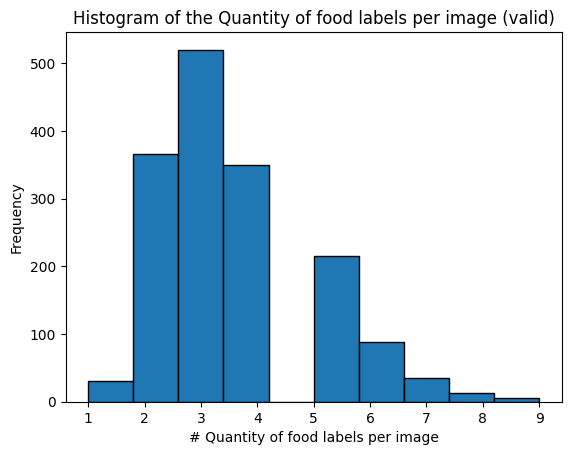

[('000052',
  ['shiitake',
   'pork',
   'carrot',
   'white button mushroom',
   'broccoli',
   'noodles',
   'pepper'],
  7),
 ('000049', ['apple', 'dried cranberries', 'cheese butter'], 3),
 ('000053', ['steak', 'rice', 'broccoli'], 3),
 ('000047',
  ['pasta', 'cauliflower', 'broccoli', 'tomato', 'carrot', 'fried meat'],
  6),
 ('000046',
  ['rice', 'broccoli', 'fish', 'other ingredients', 'other ingredients'],
  5),
 ('000058', ['bread', 'onion', 'steak', 'fried meat'], 4),
 ('000050', ['pork', 'noodles', 'pepper'], 3),
 ('000053', ['other ingredients', 'tea'], 2),
 ('000044', ['bread', 'sauce'], 2),
 ('000051', ['carrot', 'chicken duck', 'lemon'], 3),
 ('000056', ['soy', 'fried meat', 'bread', 'egg tart'], 4),
 ('000046', ['pie', 'strawberry', 'egg tart'], 3),
 ('000048',
  ['carrot', 'pepper', 'milkshake', 'egg tart', 'asparagus', 'french fries'],
  6),
 ('000045', ['ice cream', 'strawberry', 'bread'], 3),
 ('000059', ['ice cream', 'potato', 'pie', 'cheese butter', 'sausage'], 5)

In [5]:
import os
import matplotlib.pyplot as plt

directory = '/Users/marcelosouza/Documents/MBA_USP/5_TCC/Insulin_Suggester/Datasets/food v18.v1i.yolov8/valid/labels'

list_food_used = [x for x in range(len(dataset_food_list)) if x not in list_food_not_used]
results_filtered = []
            
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath) as f:
            content = f.read()
            nums_label = []
            nums = [int(word) for word in content.split() if word.isdigit()]
            nums_label.extend([num for num in nums if num > 1 and num in list_food_used])
            nums_label_text = [dataset_food_list[i] for i in nums_label if i > 0 and i <= len(dataset_food_list)]
            filename_reduced = filename[:6]
            if len(nums_label) > 0:
                results_filtered.append((filename_reduced, nums_label_text, len(nums_label)))
                # results_filtered.append((filename_reduced, nums_label, len(nums_label)))


# Extract the data for the histogram
data = [item[2] for item in results_filtered]

# Plot the histogram
plt.hist(data, bins=10, edgecolor='black')

# Set the x-ticks to cover all the values in the data, from the minimum to the maximum
plt.xticks(range(min(data), max(data) + 1))

plt.xlabel('# Quantity of food labels per image')
plt.ylabel('Frequency')
plt.title('Histogram of the Quantity of food labels per image (valid)')
plt.show() 
            
# plt.hist([item[2] for item in results_filtered], bins=9, edgecolor='black')
# plt.xlabel('# Quantidade de comidas identificadas por imagem')
# plt.ylabel('Frequência')
# plt.title('Histograma da Quantidade de comidas identificadas (valid)')
# plt.show()

display(results_filtered)

In [11]:
results_filtered_index = []
[results_filtered_index.append(t[0]) for t in results_filtered if t[0] not in results_filtered_index]
display(results_filtered_index)

['038817',
 '116183',
 '148966',
 '161179',
 '165713',
 '163890',
 '156073',
 '119462',
 '108771',
 '158603',
 '164003',
 '175349',
 '183297',
 '113001',
 '116573',
 '183618',
 '161667',
 '145137',
 '159072',
 '175914',
 '132790',
 '159343',
 '125669',
 '128363',
 '105270',
 '171353',
 '104784',
 '168408',
 '158344',
 '184139',
 '134201',
 '165578',
 '110118',
 '133993',
 '124645',
 '118138',
 '141322',
 '137130',
 '151871',
 '140032',
 '113401',
 '118925',
 '159922',
 '046894',
 '135117',
 '161069',
 '140142',
 '075765',
 '148883',
 '134138',
 '100198',
 '081706',
 '170016',
 '167425',
 '104436',
 '130772',
 '174956',
 '109020',
 '170102',
 '157119',
 '172682',
 '112405',
 '172920',
 '121566',
 '150340',
 '095449',
 '139113',
 '155047',
 '134875',
 '051177',
 '070963',
 '157738',
 '153553',
 '164481',
 '143382',
 '093671',
 '154607',
 '148036',
 '122088',
 '184686',
 '030762',
 '152016',
 '150763',
 '108612',
 '150631',
 '129822',
 '146918',
 '167000',
 '153998',
 '130159',
 '174212',